# Import necassary libraries

In [23]:
import numpy as np
import pandas as pd
import os
import torch
import wandb
import json
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
torch.cuda.is_available()

True

# Retrieve dataset and prepare it for the model

Index(['Unnamed: 0', 'names', 'contents', 'classIndex'], dtype='object')
Index(['contents', 'classIndex'], dtype='object')
[0 1 2]


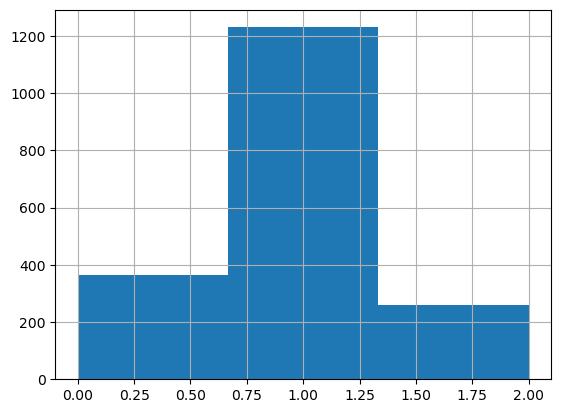

In [2]:
classesList = ['andere','factuur','aanmaning']

Dataset = pd.read_csv(os.getcwd() + "\\test_extraction_emails.csv")
Dataset['classIndex'].hist(bins=3)
print(Dataset.columns)
Dataset = Dataset.drop(['Unnamed: 0','names'],axis=1)
print(Dataset.columns)
#Dataset = Dataset.drop(Dataset[Dataset['classIndex'] == 0].index,axis=0)
#Dataset.loc[Dataset['classIndex'] == 1, 'classIndex'] = 0
#Dataset.loc[Dataset['classIndex'] == 2, 'classIndex'] = 1
print(Dataset['classIndex'].unique())

### Split dataset into train/test set

In [3]:
trainSet, testSet = train_test_split(Dataset, test_size=0.1, stratify=Dataset['classIndex'], random_state=42)

### Define helper functions and variables

In [4]:
#check if CUDA capable gpu is available
cudaAvailable = torch.cuda.is_available()

def calculate_class_weights(trainingDataset,numberOfLabels):
    weightList = []
    for i in range(0,numberOfLabels):
        weight = len(trainingDataset.index) / (numberOfLabels * len(trainingDataset[trainingDataset['classIndex'] == i].index))
        weightList.append(weight)
    print(weightList)
    return weightList

# Define model/sweep and start training

In [5]:
sweepConfig = {'method' : 'grid', 'parameters' : {'num_train_epochs' : {'min' : 8, 'max' : 10}}}
sweepID = wandb.sweep(sweepConfig, project='Test sweep')

def train():
    wandb.init()
    trainArgumentsSweep = {'reprocess_input_data' : True, 'use_multiprocessing' : True, 'overwrite_output_dir' : True, 'use_early_stopping' : True, 'early_stopping_consider_epochs' : True, 'train_batch_size' : 64, 'optimizer' : 'AdamW', 'save_model_every_epoch' : False, 'wandb_project' : 'Test sweep'}
    classifierSweep = ClassificationModel("bert","GroNLP/bert-base-dutch-cased", num_labels=3,args=trainArgumentsSweep, use_cuda=True, weight=calculate_class_weights(trainSet,3), sweep_config=wandb.config)
    classifierSweep.train_model(trainSet)
    classifierSweep.eval_model(testSet)
    wandb.join()
    
wandb.agent(sweepID, train)

Create sweep with ID: wbwbp040
Sweep URL: https://wandb.ai/spacehack100/Test%20sweep/sweeps/wbwbp040


wandb: Agent Starting Run: r9t6ycy6 with config:
wandb: 	num_train_epochs: 8
wandb: Currently logged in as: spacehack100. Use `wandb login --relogin` to force relogin


[1.6909827760891591, 0.5025594700391448, 2.387696709585122]


Some weights of the model checkpoint at GroNLP/bert-base-dutch-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/bert-base

  0%|          | 0/1669 [00:00<?, ?it/s]

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 0 of 8:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 1 of 8:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 2 of 8:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 3 of 8:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 4 of 8:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 5 of 8:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 6 of 8:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 7 of 8:   0%|          | 0/27 [00:00<?, ?it/s]

C:\Users\jensk\miniconda3\envs\gpu\lib\site-packages\simpletransformers\classification\classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/186 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/24 [00:00<?, ?it/s]

wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.


Training loss,█▃▂▁
global_step,▁▃▆█
lr,█▆▃▁
Training loss,0.01459
global_step,200
lr,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kjpdq1cp with config:
wandb: 	num_train_epochs: 9


[1.6909827760891591, 0.5025594700391448, 2.387696709585122]


Some weights of the model checkpoint at GroNLP/bert-base-dutch-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/bert-base

  0%|          | 0/1669 [00:00<?, ?it/s]

Epoch:   0%|          | 0/9 [00:00<?, ?it/s]

Running Epoch 0 of 9:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 1 of 9:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 2 of 9:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 3 of 9:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 4 of 9:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 5 of 9:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 6 of 9:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 7 of 9:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 8 of 9:   0%|          | 0/27 [00:00<?, ?it/s]

C:\Users\jensk\miniconda3\envs\gpu\lib\site-packages\simpletransformers\classification\classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/186 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/24 [00:00<?, ?it/s]

Training loss,█▃▂▁
global_step,▁▃▆█
lr,█▆▃▁
Training loss,0.02537
global_step,200
lr,1e-05


wandb: Agent Starting Run: l9fsv5je with config:
wandb: 	num_train_epochs: 10


[1.6909827760891591, 0.5025594700391448, 2.387696709585122]


Some weights of the model checkpoint at GroNLP/bert-base-dutch-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/bert-base

  0%|          | 0/1669 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

C:\Users\jensk\miniconda3\envs\gpu\lib\site-packages\simpletransformers\classification\classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/186 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/24 [00:00<?, ?it/s]

Training loss,█▅▁▁▂
global_step,▁▃▅▆█
lr,█▆▄▃▁
Training loss,0.07907
global_step,250
lr,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


### Move best result into sepperate model

In [5]:
trainArguments = {'reprocess_input_data' : True, 'use_multiprocessing' : True, 'num_train_epochs' : 10, 'overwrite_output_dir' : True, 'use_early_stopping' : True, 'early_stopping_consider_epochs' : True, 'train_batch_size' : 64, 'optimizer' : 'AdamW', 'save_model_every_epoch' : False, 'wandb_project' : 'Test seperate'}
classifier = ClassificationModel("bert","GroNLP/bert-base-dutch-cased", num_labels=3,args=trainArguments, use_cuda=True, weight=calculate_class_weights(trainSet,3))
classifier.train_model(trainSet)

[1.6909827760891591, 0.5025594700391448, 2.387696709585122]


Some weights of the model checkpoint at GroNLP/bert-base-dutch-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/bert-base

  0%|          | 0/1669 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

wandb: Currently logged in as: spacehack100. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/27 [00:00<?, ?it/s]

(270, 0.21263900532697638)

### Evaluate the resulting model against test set

In [10]:
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

result, model_outputs, wrong_predictions = classifier.eval_model(testSet, f1=f1_multiclass, confusionMatrix=confusion_matrix)
print(result)

C:\Users\jensk\miniconda3\envs\gpu\lib\site-packages\simpletransformers\classification\classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/186 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/24 [00:00<?, ?it/s]

{'mcc': 0.7355964699433565, 'f1': 0.8709677419354839, 'confusionMatrix': array([[ 30,   7,   0],
       [  3, 117,   3],
       [  4,   7,  15]], dtype=int64), 'eval_loss': 1.3144793888932327}


In [24]:
wrong_predictions
print(type(wrong_predictions[0]))
for i, x in enumerate(wrong_predictions):
    wrong_predictions[i] = str(wrong_predictions[i])
print(type(wrong_predictions[0]))
for i, x in enumerate(wrong_predictions):
    wrong_predictions[i] = json.loads(wrong_predictions[i])
print(type(wrong_predictions[0]))
#pd.DataFrame(wrong_predictions)

<class 'str'>
<class 'str'>


JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

### Save model localy

# Conclusion:
BERTje is able to classify emails with high accuracy and percision, but is significantly slower to train or use inference on. However, this can be mitigated by using a more powerfull gpu (at least for training)
- Avg training time with Nvidia RTX 3070 mobile (at 100W tdp) = ~8 seconds per epoch (batch size of 64)
- Avg training time with Nvidia Quadro t1000 mobile (at 50W tdp) = ~7-8 minutes per epoch (batch size of 16)

# Sources:
- https://www.philschmid.de/bert-text-classification-in-a-different-language
- https://huggingface.co/GroNLP/bert-base-dutch-cased
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html
- https://huggingface.co/docs/transformers/perf_train_gpu_one
- https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights